In [ ]:
from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
filename="/content/drive/MyDrive/CODING_DOJO/CÓDIGO/WEEK2/PTCienciaDeDatos/PandasParaManipulaciónDeDatos/sales_predictions (1).csv"
df=pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
mean_weight=df['Item_Weight'].mean()

In [ ]:
df.loc[0:8523, ['Item_Weight']].fillna(df['Item_Weight'].mean()).head(100)

,Item_Weight
0,9.300000
1,5.920000
2,17.500000
3,19.200000
4,8.930000
...,...
95,12.857645
96,12.150000
97,8.750000
98,12.857645


In [ ]:
df.groupby(['Outlet_Size'])[['Item_Identifier']].count()

,Item_Identifier
Outlet_Size,
High,932
Medium,2793
Small,2388


In [ ]:
df=df.dropna()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.replace("LF","Low Fat", inplace=True)
df.replace("low fat","Low Fat", inplace=True)
df.replace("reg","Regular", inplace=True)

In [ ]:
#Crea varias visualizaciones de datos que te ayuden a entender mejor los datos con los que estás trabajando 
#(análisis exploratorio de datos) y que ayude a otras personas entender las tendencias en los datos (análisis explicativo de datos).

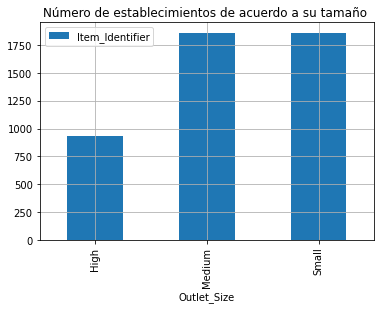

In [ ]:
#Número de establecimientos de acuerdo a su tamaño 
df.groupby(['Outlet_Size'])[['Item_Identifier']].count().plot(kind="bar")
plt.title('Número de establecimientos de acuerdo a su tamaño ')
plt.grid()

In [ ]:
serie=df.Outlet_Size.value_counts()

Text(0.5, 1.0, 'Proporción de tiendas ')

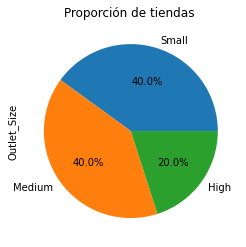

In [ ]:
#proporción de tiendas 
serie.plot.pie(autopct="%1.1f%%")
plt.title('Proporción de tiendas ')


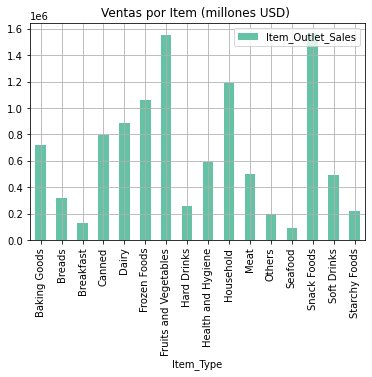

In [ ]:
#Ventas por tipo de item 
df.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum().plot(kind="bar",cmap="Set2")
plt.title('Ventas por Item (millones USD) ')
plt.grid()

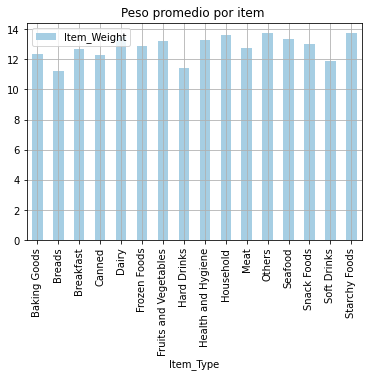

In [ ]:
#Peso promedio de acuerdo al tipo de item
df.groupby(['Item_Type'])[['Item_Weight']].mean().plot(kind="bar",cmap="Paired")
plt.title('Peso promedio por item ')
plt.grid()

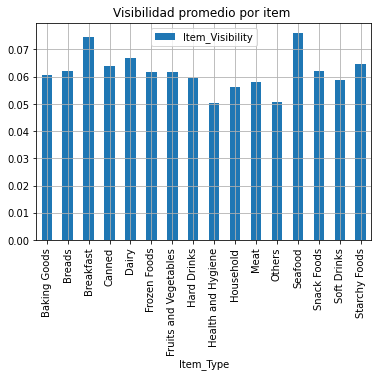

In [ ]:
#Porcentaje medio de visibilidad por tipo de Item
df.groupby(['Item_Type'])[['Item_Visibility']].mean().plot(kind="bar")
plt.title('Visibilidad promedio por item ')
plt.grid()

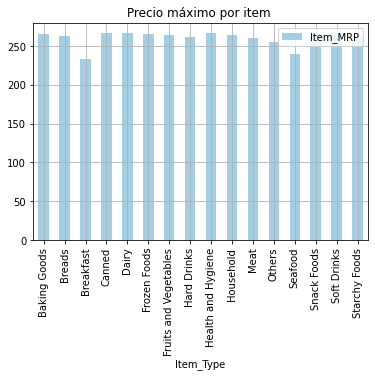

In [ ]:
#precio máximo por tipo de Item
df.groupby(['Item_Type'])[['Item_MRP']].max().plot(kind="bar",cmap="Paired")
plt.title('Precio máximo por item ')
plt.grid()

#*Parte 4*

In [ ]:
#Histogramas para ver la distribución de varias características en tu conjunto de datos

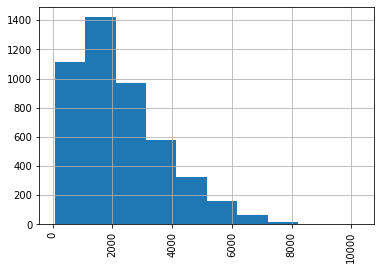

In [ ]:
import matplotlib.pyplot as plt
sales = df.loc[:, 'Item_Outlet_Sales'].hist()
sales
plt.xticks(rotation = 90)
plt.ticklabel_format(useOffset=False, style='plain')

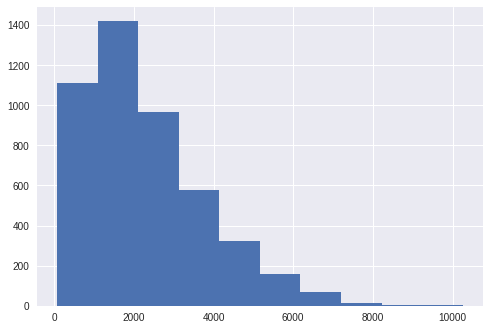

In [ ]:
plt.style.use('seaborn')
price_filter = df.loc[:, 'Item_Outlet_Sales'] <= 1000000
df.loc[price_filter, 'Item_Outlet_Sales'].hist()

plt.ticklabel_format(useOffset=False, style='plain')

In [ ]:
#Diagramas de caja para ver los resúmenes estadísticos de varias características en tu conjunto de datos.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


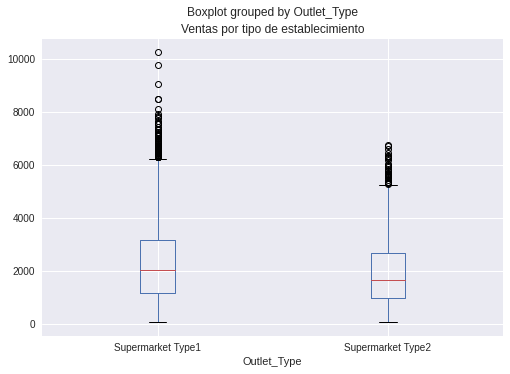

In [ ]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Type');
plt.title('Ventas por tipo de establecimiento');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


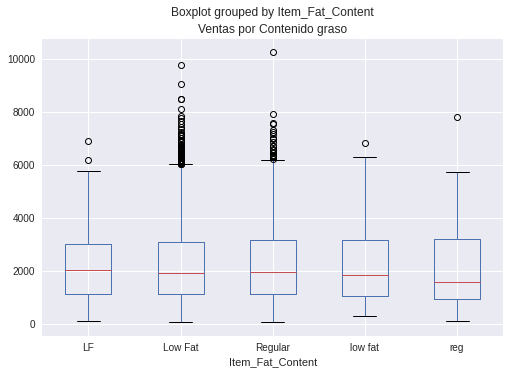

In [ ]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Fat_Content');
plt.title('Ventas por Contenido graso');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


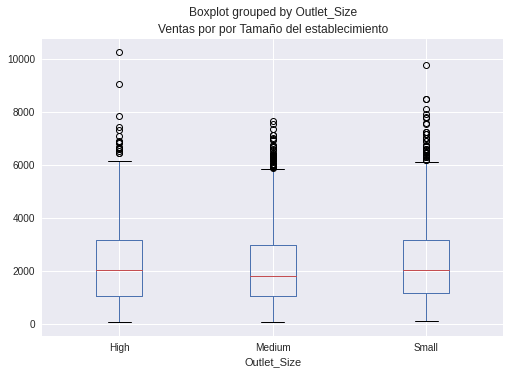

In [ ]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Size');
plt.title('Ventas por por Tamaño del establecimiento');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

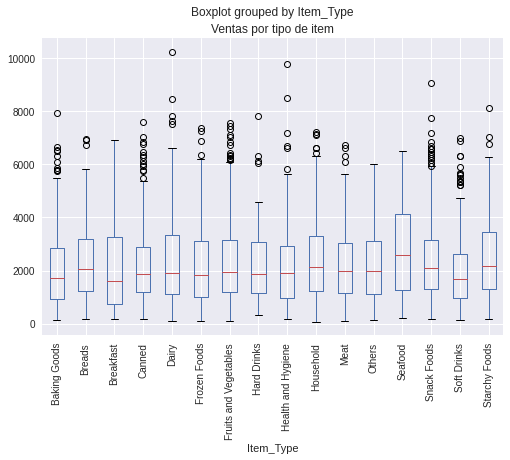

In [ ]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type');
plt.title('Ventas por tipo de item');
plt.xticks(rotation = 90)


#Parte 5

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [ ]:
df2=df

In [ ]:
df2["Outlet_Size"].fillna("Medium", inplace=True)
df2["Outlet_Size"].fillna("Medium", inplace=True)
df2["Item_Weight"].fillna("10.65", inplace=True)#reemplazar con la media
df2["Item_Weight"].replace("Medium",10.65, inplace=True)#reemplazar con la media

In [ ]:
df2.head(200)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Idlabel,Fclabel,Iflabel,Itlabel,Fat_contentlabel,Item_typelabel,Item_identifierlabel,Outlet_identifierlabel,Outlet_sizelabel,Outlet_location_type,Outlet_typelabel
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,0,4,4,0,4,156,9,1,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,1,14,14,1,14,8,3,1,2,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,0,10,10,0,10,662,9,1,0,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1121,1,6,6,1,6,1121,0,1,2,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,0,9,9,0,9,1297,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,FDT20,10.50,Low Fat,0.041395,Fruits and Vegetables,37.6164,OUT046,1997,Small,Tier 1,Supermarket Type1,540.6296,932,0,6,6,0,6,932,8,2,0,1
196,FDB41,19.00,Regular,0.097313,Frozen Foods,48.0718,OUT046,1997,Small,Tier 1,Supermarket Type1,992.7078,221,1,5,5,1,5,221,8,2,0,1
197,NCN55,14.60,Low Fat,0.059583,Others,238.8538,OUT049,1999,Medium,Tier 1,Supermarket Type1,6008.8450,1420,0,11,11,0,11,1420,9,1,0,1
198,FDE40,0.00,Regular,0.098664,Dairy,62.9194,OUT027,1985,Medium,Tier 3,Supermarket Type3,2105.2596,343,1,4,4,1,4,343,5,1,2,3


In [ ]:
LE=LabelEncoder()

In [ ]:
IDlabel=LE.fit_transform(df2["Item_Identifier"])
IDmap= {index:label for index, label in enumerate(LE.classes_)}
df2["Item_identifierlabel"]=IDlabel

FClabel=LE.fit_transform(df2["Item_Fat_Content"])
FCmap= {index:label for index, label in enumerate(LE.classes_)}
df2["Fat_contentlabel"]=FClabel

ITlabel=LE.fit_transform(df2["Item_Type"])
ITmap= {index:label for index, label in enumerate(LE.classes_)}
df2["Item_typelabel"]=ITlabel

OIlabel=LE.fit_transform(df2["Outlet_Identifier"])
OImap= {index:label for index, label in enumerate(LE.classes_)}
df2["Outlet_identifierlabel"]=OIlabel

OSlabel=LE.fit_transform(df2["Outlet_Size"])
OSmap= {index:label for index, label in enumerate(LE.classes_)}
df2["Outlet_sizelabel"]=OSlabel

OLTlabel=LE.fit_transform(df2["Outlet_Location_Type"])
OLTmap= {index:label for index, label in enumerate(LE.classes_)}
df2["Outlet_location_type"]=OLTlabel

OTlabel=LE.fit_transform(df2["Outlet_Type"])
OTmap= {index:label for index, label in enumerate(LE.classes_)}
df2["Outlet_typelabel"]=OTlabel


In [ ]:
df2.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Idlabel,Fclabel,Iflabel,Itlabel,Fat_contentlabel,Item_typelabel,Item_identifierlabel,Outlet_identifierlabel,Outlet_sizelabel,Outlet_location_type,Outlet_typelabel
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,0,4,4,0,4,156,9,1,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,1,14,14,1,14,8,3,1,2,2


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Idlabel                    8523 non-null   int64  
 13  Fclabel                    8523 non-null   int64

In [ ]:
#dataframe numérico con las nuevas columnas 
df3=df2[['Item_identifierlabel','Item_Weight','Fat_contentlabel','Item_Visibility','Item_typelabel','Item_MRP','Outlet_identifierlabel','Outlet_sizelabel','Outlet_location_type','Outlet_typelabel','Item_Outlet_Sales']]
df3.head(1)

,Item_identifierlabel,Item_Weight,Fat_contentlabel,Item_Visibility,Item_typelabel,Item_MRP,Outlet_identifierlabel,Outlet_sizelabel,Outlet_location_type,Outlet_typelabel,Item_Outlet_Sales
0,156,9.3,0,0.016047,4,249.8092,9,1,0,1,3735.138


In [ ]:
X = df3[['Item_identifierlabel','Item_Weight','Fat_contentlabel','Item_Visibility','Item_typelabel','Item_MRP','Outlet_identifierlabel','Outlet_sizelabel','Outlet_location_type','Outlet_typelabel']].values
y = df3['Item_Outlet_Sales']

In [ ]:
#importar librerías
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [133]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=3)#variables de testeo y entrenamiento 
sc = StandardScaler()#estandarizar datos (menor variabilidad de datos)
sc.fit(Xtrain)#entrenamiento con xtrain
Xtrain = sc.transform(Xtrain)#transformar a la misma escala
Xtest = sc.transform(Xtest)

In [122]:
#instanciar el modelo
lr = LinearRegression(fit_intercept=True) #fitintercep (hiperparámetro)


In [123]:
lr.fit(Xtrain, ytrain) #caratcterísticas para la salida del modelo #entrenamiento

LinearRegression()

In [124]:
lr.predict(X[0:10])

array([247144.95608297,  50699.03666033, 141034.36687283, 176867.95043007,
        51891.17453829,  52103.93115418,  57641.63352629, 107022.45687383,
        97739.46458965, 184057.86571195])

In [137]:
lr.score(Xtest, ytest)

0.5385938524667695

In [149]:
#knn sin entrenamiento
knn = KNeighborsRegressor()
knn.fit(X,y)

KNeighborsRegressor()

In [151]:
knn.predict(X)

array([5627.60792,  827.72256, 1454.1072 , ..., 1210.15808, 2255.7304 ,
       1225.072  ])

In [152]:
knn.score(X,y)

0.4637318540538288

In [145]:
#knn con entrenamiento
knntrain = KNeighborsRegressor()
knntrain.fit(Xtrain,ytrain)

KNeighborsRegressor()

In [146]:
knntrain.predict(X[0:10])

array([3689.1978 , 3218.61036, 4819.7262 , 3551.3772 , 3551.3772 ,
       3551.3772 , 3551.3772 , 4718.25828, 4261.65264, 3551.3772 ])

In [147]:
knn.score(Xtrain, ytrain)

0.6426560239526424

In [148]:
knn.score(xtest, ytest)

0.6343359276206493

#PARTE FINAL

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [158]:
df3.head()

,Item_identifierlabel,Item_Weight,Fat_contentlabel,Item_Visibility,Item_typelabel,Item_MRP,Outlet_identifierlabel,Outlet_sizelabel,Outlet_location_type,Outlet_typelabel,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052


In [178]:
#MATRIZ DE CARACTERÍSTICAS 

df3.shape

(8523, 11)

In [179]:
x = df3
x.shape

(8523, 11)

In [180]:
y = df3.loc[:, 'Item_Outlet_Sales'].values
y.shape

(8523,)

In [181]:
#Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 3)

In [200]:
cols = df3.columns.values.tolist()
predict = cols[:10]
target = cols[10]
X = df3[predict]
Y = df3[target]

In [201]:
y


array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [202]:
from sklearn.tree import DecisionTreeRegressor

In [203]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=0)

In [196]:
df3=df3.apply(pd.to_numeric)

In [207]:
regtree.fit(X,Y).cols = df3.columns.values.tolist()
predict = cols[:11]
target = cols[10]
X = df[predict]
Y = df[target]

In [ ]:
from sklearn.tree import export_text


In [208]:
text = export_text(regtree)
print(text)

|--- feature_5 <= 143.53
|   |--- feature_9 <= 0.50
|   |   |--- feature_5 <= 82.01
|   |   |   |--- feature_5 <= 49.05
|   |   |   |   |--- feature_5 <= 43.55
|   |   |   |   |   |--- value: [80.25]
|   |   |   |   |--- feature_5 >  43.55
|   |   |   |   |   |--- value: [107.31]
|   |   |   |--- feature_5 >  49.05
|   |   |   |   |--- feature_4 <= 10.50
|   |   |   |   |   |--- value: [174.27]
|   |   |   |   |--- feature_4 >  10.50
|   |   |   |   |   |--- value: [131.12]
|   |   |--- feature_5 >  82.01
|   |   |   |--- feature_5 <= 106.63
|   |   |   |   |--- feature_1 <= 5.61
|   |   |   |   |   |--- value: [248.28]
|   |   |   |   |--- feature_1 >  5.61
|   |   |   |   |   |--- value: [187.81]
|   |   |   |--- feature_5 >  106.63
|   |   |   |   |--- feature_4 <= 7.50
|   |   |   |   |   |--- value: [249.52]
|   |   |   |   |--- feature_4 >  7.50
|   |   |   |   |   |--- value: [314.09]
|   |--- feature_9 >  0.50
|   |   |--- feature_5 <= 76.43
|   |   |   |--- feature_1 <= 2.44
|

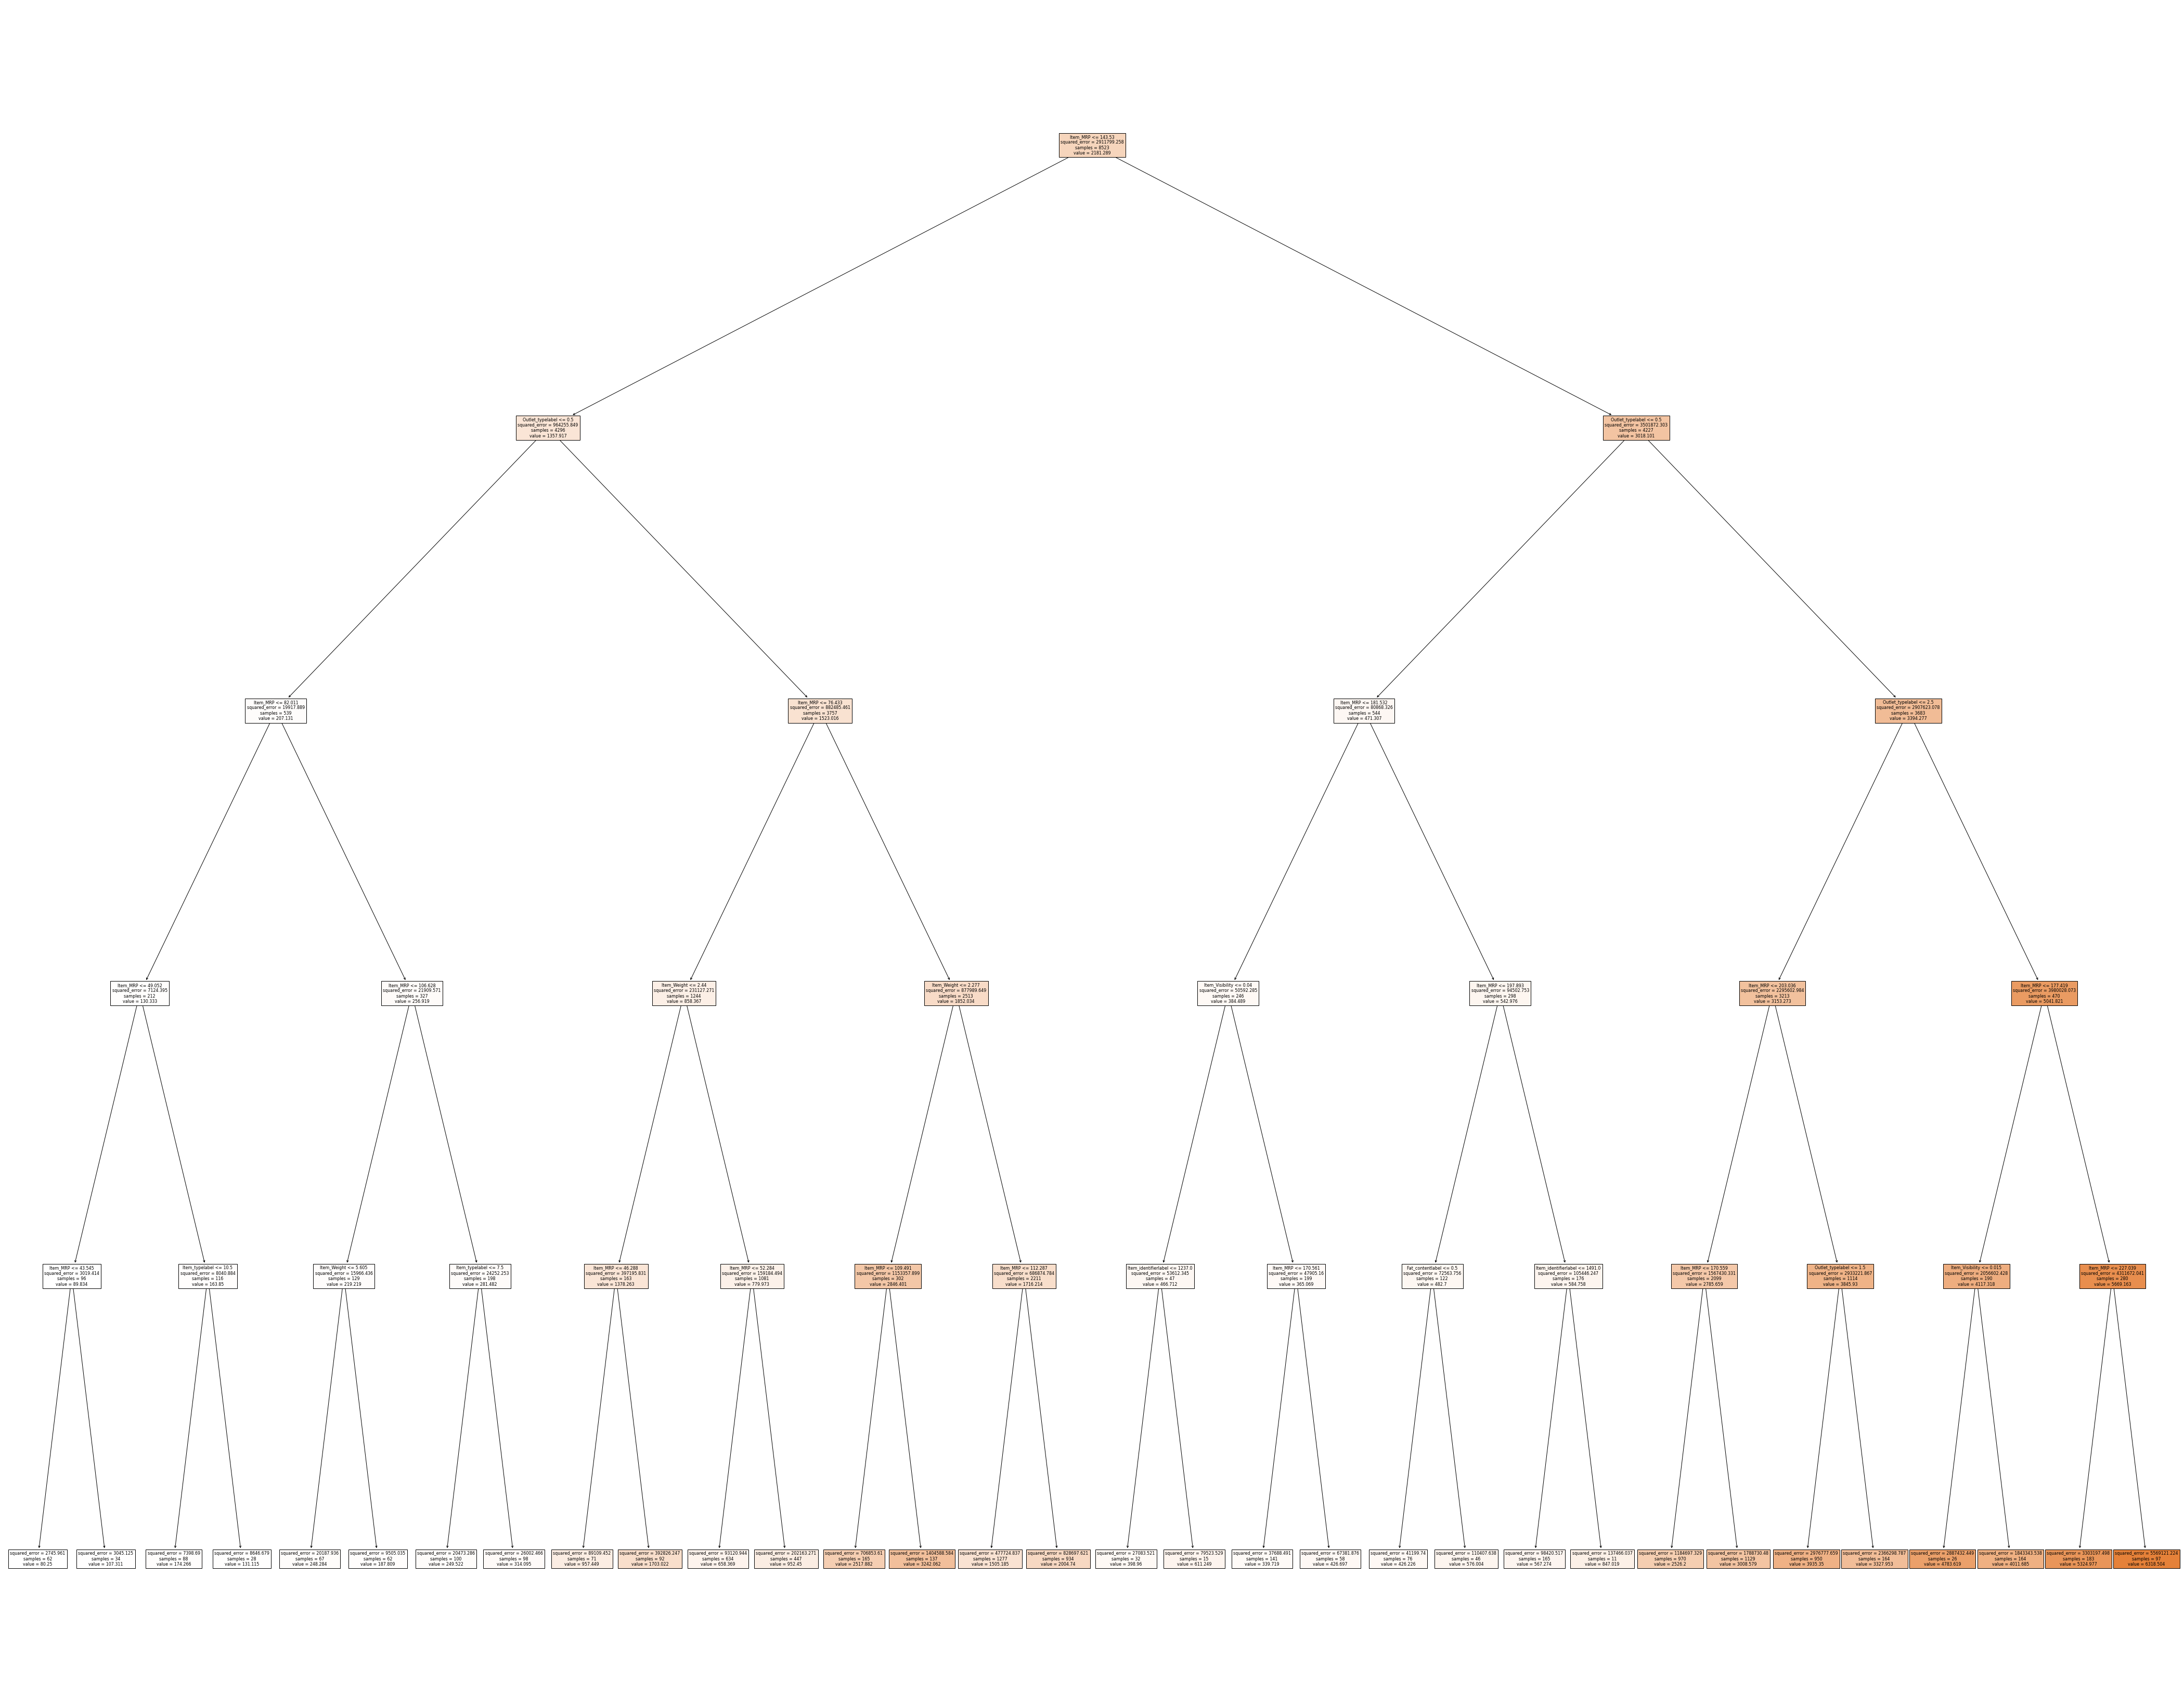

In [221]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(75,60))
_ = tree.plot_tree(regtree, 
                   feature_names = df3.columns[:10],
                   class_names = df3.columns[10], 
                   filled=True)